In [36]:
import pickle
import matplotlib.pyplot as plt

from itertools import combinations
from brian2 import *

# load the data

In [3]:
result_path = 'results/results2.pkl'
with open(result_path, 'rb') as f:
    results = pickle.load(f)

# Analyse the data 

In [4]:
pyr_stim0=results['PYRData0']
pyr_stim1=results['PYRData1']

In [10]:
def expand_spike_train(spike_times_raw):
    # transfer the raw data into a list of spike times (unit-free)
    result = []
    for values in spike_times_raw:
        for value in values:
            result.append(value / second)
    return result


In [32]:
def mean_phase_cohearence(spike_times_a, spike_times_b):
    # calculate the mean phase coherence between two spike trains
    mean_sin = 0
    mean_cos = 0
    count = 0
    if not(spike_times_a and spike_times_b):
        return None
    for spike_time_a in spike_times_a:
        spike_time_b_2, idx = next(((spike_time_b, idx) for (idx, spike_time_b) in enumerate(spike_times_b) if spike_time_b > spike_time_a), (0, 0))
        if idx == 0:
            continue
        count += 1
        spike_time_b_1 = spike_times_b[idx - 1]
        phase = 2*np.pi*(spike_time_a - spike_time_b_1) / (spike_time_b_2 - spike_time_b_1)
        mean_sin += np.sin(phase)
        mean_cos += np.cos(phase)
    mean_sin /= count
    mean_cos /= count
    return (mean_sin**2 + mean_cos**2)**0.5

In [33]:
neuron_keys = [str(i) for i in range(400)]
spike_times = [expand_spike_train(pyr_stim0[neuron_key]) for neuron_key in neuron_keys]
spike_times_pairs_vertical = combinations(spike_times[0:99], 2)

In [34]:
vertical_coherences = [mean_phase_cohearence(spike_times_a, spike_times_b) for (spike_times_a, spike_times_b) in spike_times_pairs_vertical]

In [35]:
np.mean(vertical_coherences)

0.599536478716077

(array([   5.,   35.,   91.,  114.,  193.,  654., 1606., 1590.,  504.,
          59.]),
 array([0.38688536, 0.41876819, 0.45065102, 0.48253385, 0.51441669,
        0.54629952, 0.57818235, 0.61006518, 0.64194801, 0.67383084,
        0.70571367]),
 <BarContainer object of 10 artists>)

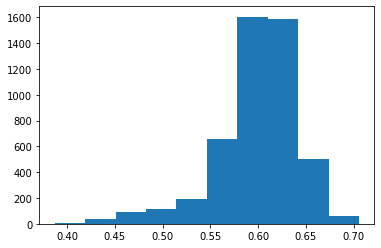

In [37]:
plt.hist(vertical_coherences)